In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the training dataset

train_data = pd.read_table("thrombin.data", sep=",")




In [3]:
# train_data.describe

train_data.shape

(1908, 139352)

In [4]:
# Read the Test dataset

test_data = pd.read_table("Thrombin.testset.data",sep=",")

In [5]:
test_data.shape

(633, 139352)

In [6]:
# Checking for null values in the data frame

train_data.isnull().values.any(axis = 1)
test_data.isnull().values.any(axis = 1)
#val_data.isnull().values.any(axis = 1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
features = []

for i in range(0,139352):
    i = str(i)
    features.append('f'+i)
#print(features)

features[0] = 'activity'

print(features[0])

activity


In [8]:
# Assigning the features to the Train dataframe

train_data.columns = features




In [9]:
train_data.describe

<bound method NDFrame.describe of      activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0           I   0   0   0   0   0   0   0   0   0   ...           0        0   
1           I   0   0   0   0   0   0   0   0   0   ...           0        0   
2           I   0   0   0   0   0   0   0   0   0   ...           0        0   
3           I   0   0   0   0   0   0   0   0   0   ...           0        0   
4           I   0   0   0   0   0   0   0   0   0   ...           0        0   
5           I   0   0   0   0   0   0   0   0   0   ...           0        0   
6           I   0   0   0   0   0   0   0   0   0   ...           0        0   
7           I   0   0   0   0   0   0   0   0   0   ...           0        0   
8           I   0   0   0   0   0   0   0   0   0   ...           0        0   
9           I   0   0   0   0   0   0   0   0   0   ...           0        0   
10          I   0   0   0   0   0   0   0   0   0   ...           0        0   
11    

In [16]:
# test_data.describe
test_data.dtypes

?           object
0            int64
0.1          int64
0.2          int64
0.3          int64
0.4          int64
0.5          int64
0.6          int64
0.7          int64
0.8          int64
0.9          int64
0.10         int64
0.11         int64
0.12         int64
0.13         int64
0.14         int64
0.15         int64
0.16         int64
0.17         int64
0.18         int64
0.19         int64
0.20         int64
0.21         int64
0.22         int64
0.23         int64
1            int64
0.24         int64
0.25         int64
0.26         int64
0.27         int64
             ...  
0.134402     int64
0.134403     int64
0.134404     int64
0.134405     int64
0.134406     int64
0.134407     int64
0.134408     int64
0.134409     int64
0.134410     int64
0.134411     int64
0.134412     int64
0.134413     int64
0.134414     int64
0.134415     int64
0.134416     int64
0.134417     int64
0.134418     int64
1.4919       int64
0.134419     int64
0.134420     int64
0.134421     int64
0.134422    

In [17]:
test_data.drop('?',axis=1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.134421,0.134422,0.134423,0.134424,0.134425,0.134426,0.134427,0.134428,0.134429,0.134430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Define X and Y

X = train_data.iloc[:,:-1]
Y = train_data.activity

In [13]:
# Test train split

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002638A505DD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002638C334668>], dtype=object)

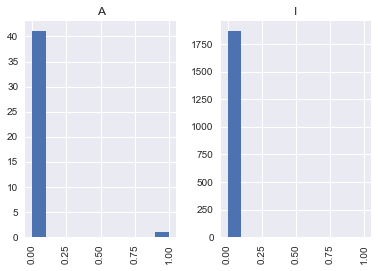

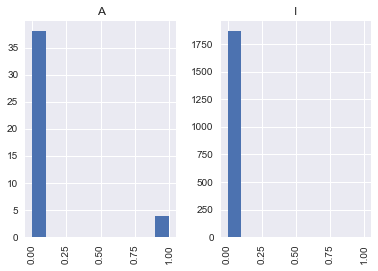

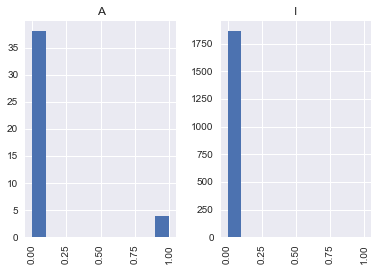

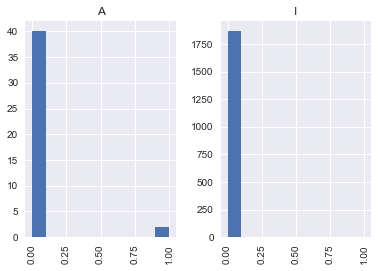

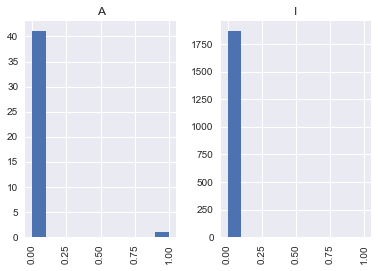

In [39]:
# Statitical plots

%matplotlib inline

train_data['f1'].hist(by=train_data['activity'])
train_data['f2'].hist(by=train_data['activity'])
train_data['f3'].hist(by=train_data['activity'])
train_data['f4'].hist(by=train_data['activity'])
train_data['f5'].hist(by=train_data['activity'])
